In [2]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = pd.read_csv("Classification of Robots from their conversation sequence.csv")
# Display the first 10 rows of the dataset
print(df.head(10))

   Robot   num1    num2     num3     num4      num5       num6       num7  \
0      1      2       5        2        5         6          2          1   
1      2   1747    1749     1751     1758      1765       1767       1772   
2      3  65056  195168  1561344  7806720  31226880  187361280  749445120   
3      4   2855    2860     2865     2870      2875       2880       2885   
4      5  11440   57200   286000  1430000   7150000   35750000  178750000   
5      1      4       9        5        4         8          6          6   
6      2   1487    1491     1498     1503      1512       1514       1518   
7      3  18850   18850   113100   452400    452400    1809600    3619200   
8      4   8962    8967     8972     8977      8982       8987       8992   
9      5   2870   14350    71750   358750   1793750    8968750   44843750   

           num8          num9         num10  
0  8.000000e+00  1.000000e+00  3.000000e+00  
1  1.774000e+03  1.783000e+03  1.785000e+03  
2  6.745006e+0

In [3]:
# Assuming your DataFrame is named df
X = df[['num1', 'num2', 'num3', 'num4', 'num5', 'num6', 'num7']]  # Features
y = df['Robot']  # Labels


# Split the data into training (80%) and test (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
scaler = StandardScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

MODEL_Trainer = KNeighborsClassifier(n_neighbors=1)

MODEL_Trainer.fit(X_train_normalized, y_train)

KNeighborsClassifier(n_neighbors=1)

Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00     19909
           2       1.00      0.85      0.92     20027
           3       1.00      1.00      1.00     20166
           4       0.87      1.00      0.93     20024
           5       1.00      1.00      1.00     19874

    accuracy                           0.97    100000
   macro avg       0.97      0.97      0.97    100000
weighted avg       0.97      0.97      0.97    100000

Confusion Matrix:
[[19909     0     0     0     0]
 [    2 16936     2  3087     0]
 [    2    20 20129     0    15]
 [    0     4     0 20020     0]
 [    0     0     0     0 19874]]


<Axes: >

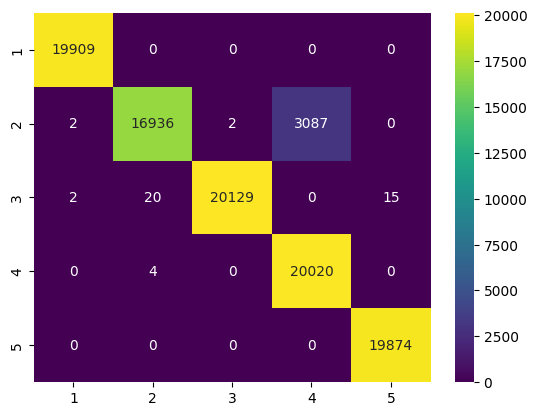

In [14]:
# Predict the trained model on our test data
y_pred = MODEL_Trainer.predict(X_test_normalized)

# Print the Classification Report and Confusion Matrix
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='viridis', xticklabels=['1', '2', '3', '4', '5'], yticklabels=['1', '2', '3', '4', '5'])

In [6]:
accuracies = []
for i in range(1,11):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_normalized, y_train)
    accuracy = knn.score(X_test_normalized, y_test)
    accuracies.append(accuracy)
    print("K value: ", i, "Accuracy: ", accuracy)

K value:  1 Accuracy:  0.96868
K value:  2 Accuracy:  0.968
K value:  3 Accuracy:  0.93723
K value:  4 Accuracy:  0.93569
K value:  5 Accuracy:  0.90179
K value:  6 Accuracy:  0.89825
K value:  7 Accuracy:  0.86609
K value:  8 Accuracy:  0.86258
K value:  9 Accuracy:  0.83835
K value:  10 Accuracy:  0.83424


Text(0.5, 0, 'K')

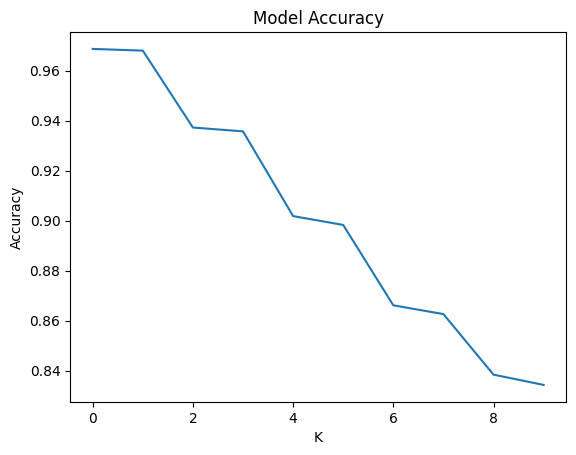

In [7]:
plt.plot(accuracies)
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('K')